In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings("ignore")

# Cleaning Data

In [2]:
df = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv",parse_dates=["date"])
df1 = pd.read_csv("/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTest.csv",parse_dates=["date"])

In [3]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(df["date"], inplace = True)

In [4]:
df1["date"] = pd.to_datetime(df1["date"])
df1.set_index(df1["date"], inplace=True)

# Graphs 

<Axes: xlabel='date', ylabel='meantemp'>

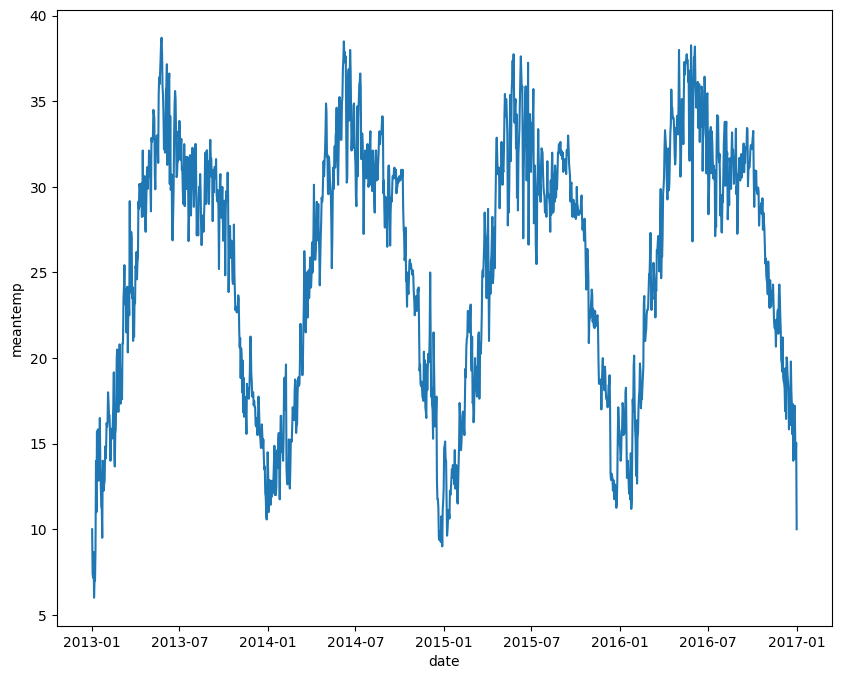

In [5]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df.index, y = df.meantemp, data = df)

<Axes: xlabel='date', ylabel='humidity'>

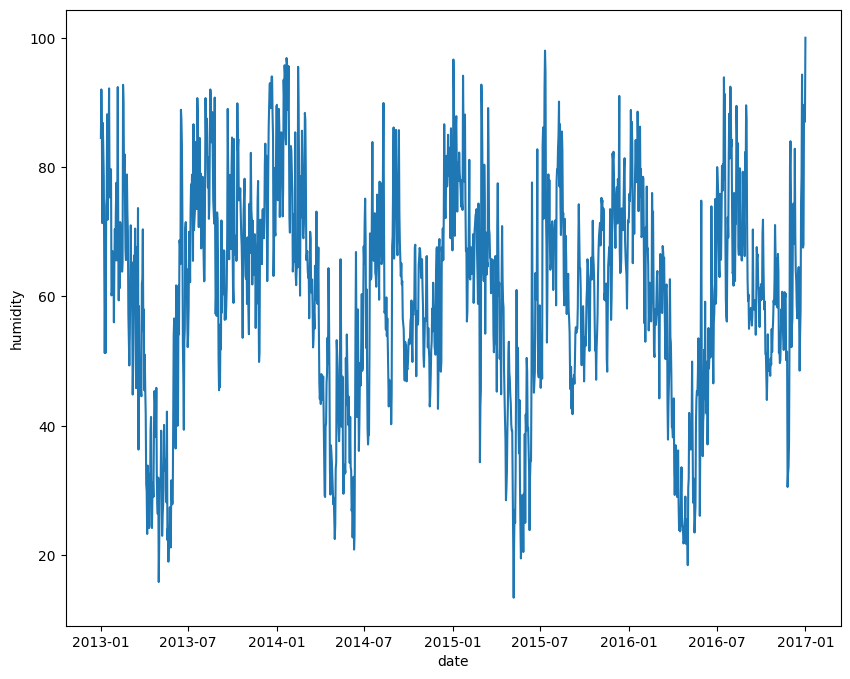

In [6]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df.index, y = df.humidity, data = df)

<Axes: xlabel='date', ylabel='wind_speed'>

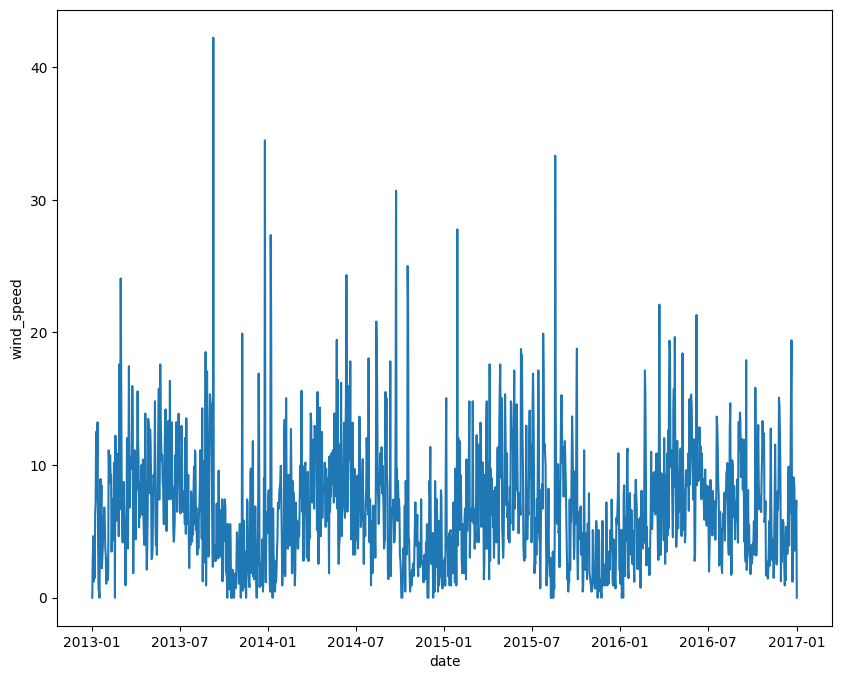

In [7]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df.index, y = df.wind_speed, data = df)

<Axes: xlabel='date', ylabel='meanpressure'>

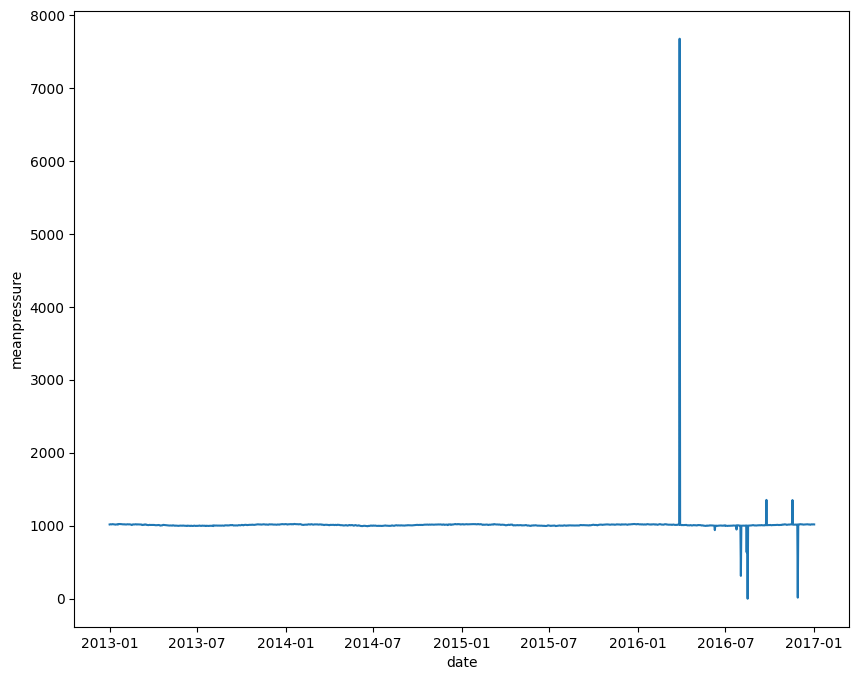

In [8]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df.index, y = df.meanpressure, data = df)

# Checking for Stationary

In [9]:
dec1 = adfuller(df["meantemp"])
dec2 = adfuller(df["humidity"])
dec3 = adfuller(df["wind_speed"])
dec4 = adfuller(df["meanpressure"])
print(dec1[1])
print(dec2[1])
print(dec3[1])
print(dec4[1])

0.2774121372301602
0.004470100478130688
0.0025407221531463502
0.0


Resamping the data

In [10]:
df_monthly = df.resample('M').mean()
df1_monthly = df1.resample('M').mean()

# Graph after resampling

<Axes: xlabel='date', ylabel='meantemp'>

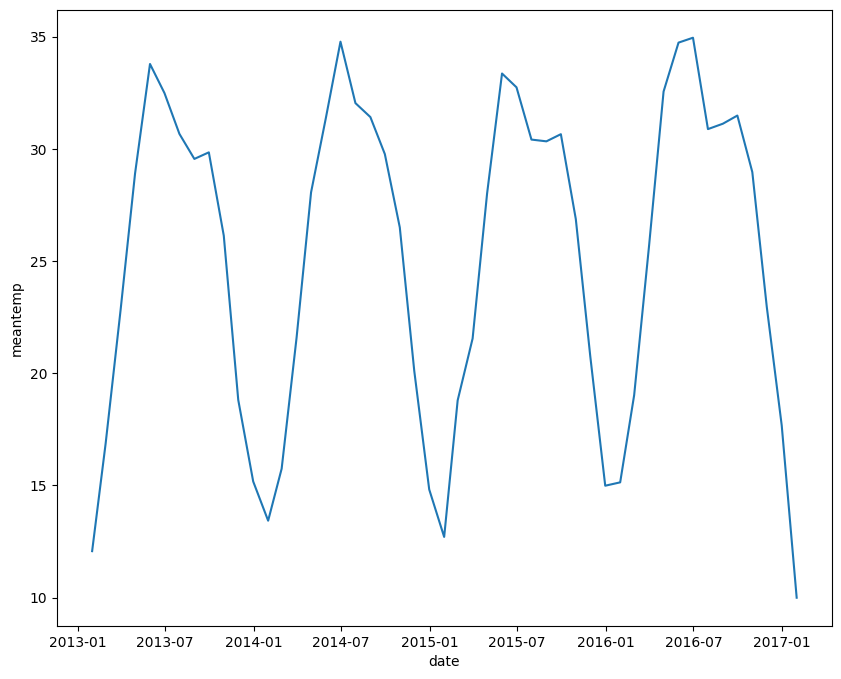

In [11]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.meantemp, data = df_monthly)

<Axes: xlabel='date', ylabel='wind_speed'>

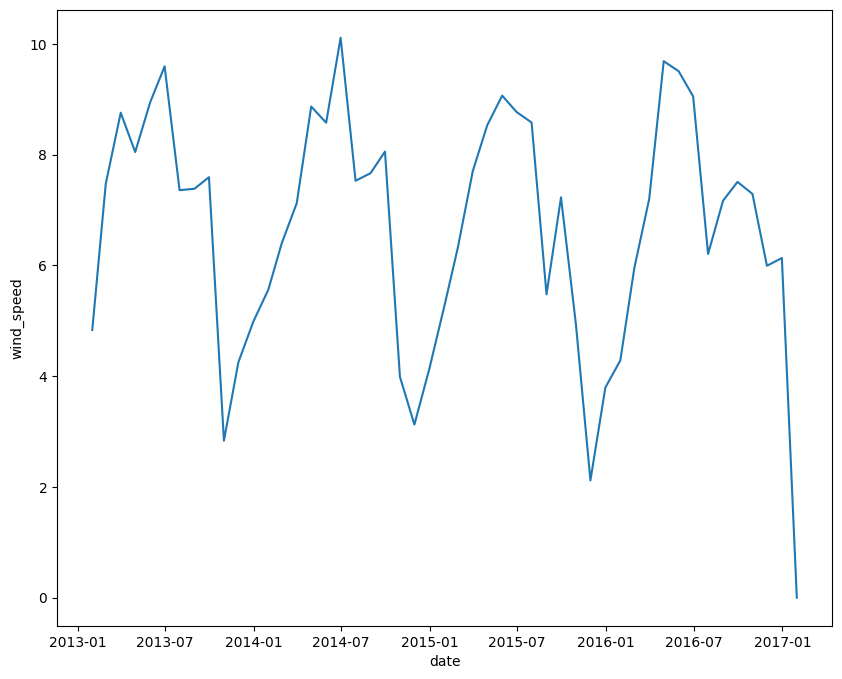

In [12]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.wind_speed, data = df_monthly)

<Axes: xlabel='date', ylabel='humidity'>

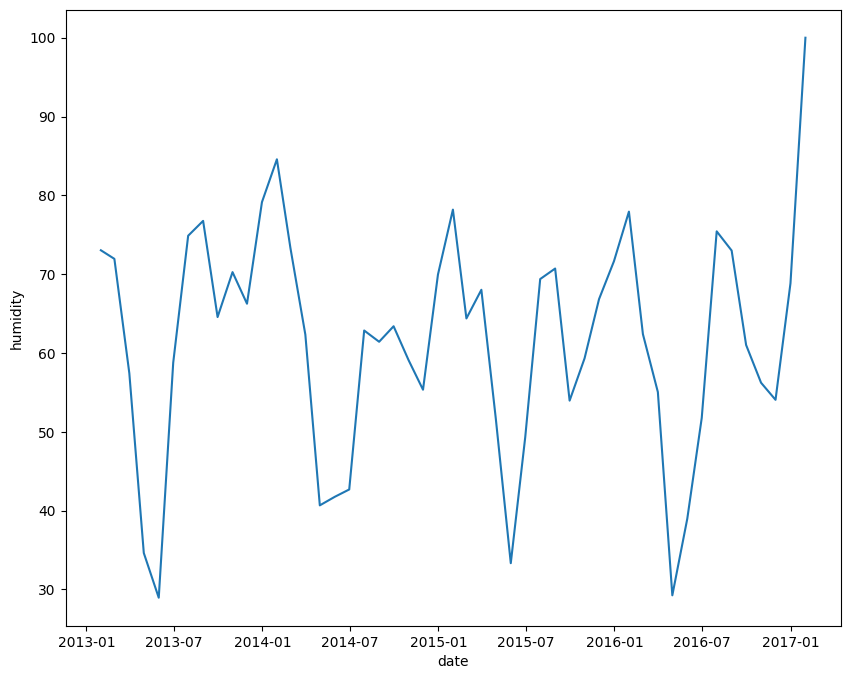

In [13]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.humidity, data = df_monthly)

<Axes: xlabel='date', ylabel='meanpressure'>

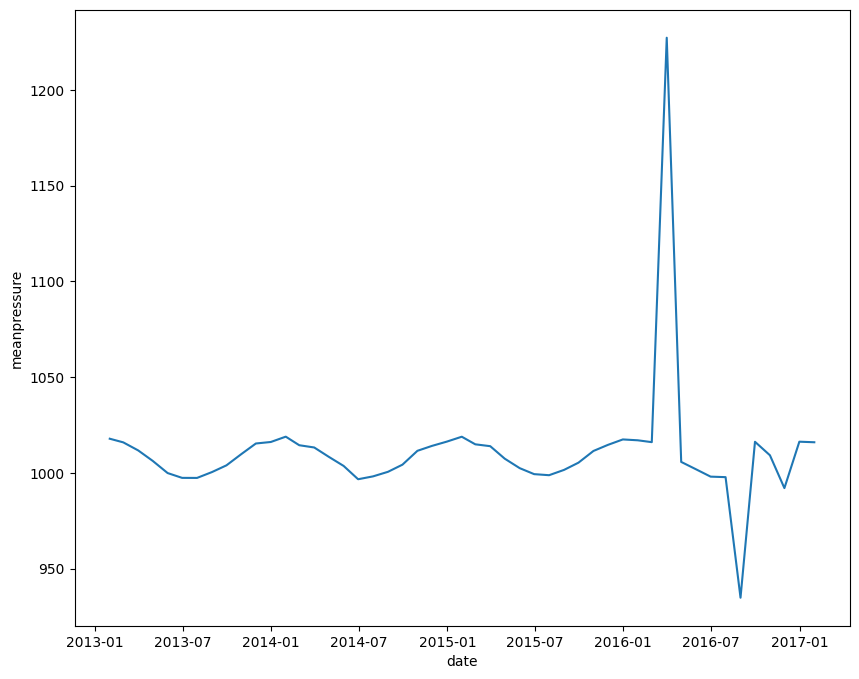

In [14]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.meanpressure, data = df_monthly)

# Check for Stiotionary after resampling

In [15]:
dec1 = adfuller(df_monthly["meantemp"])
dec2 = adfuller(df_monthly["humidity"])
dec3 = adfuller(df_monthly["wind_speed"])
dec4 = adfuller(df_monthly["meanpressure"])
print(dec1[1])
print(dec2[1])
print(dec3[1])
print(dec4[1])

0.7360356050589151
2.0222554449424128e-05
0.25750168787960526
1.4525698656417424e-08


Differencing

In [16]:
df_monthly['meantemp_seasonal_diff'] = df_monthly['meantemp'] - df_monthly['meantemp'].shift(12)
df_monthly['wind_speed_seasonal_diff'] = df_monthly['wind_speed'] - df_monthly['wind_speed'].shift(12)

In [17]:
df_monthly

,date,meantemp,humidity,wind_speed,meanpressure,meantemp_seasonal_diff,wind_speed_seasonal_diff
date,,,,,,,
2013-01-31,2013-01-16 00:00:00,12.074770,73.028802,4.833913,1017.847734,NaN,NaN
2013-02-28,2013-02-14 12:00:00,16.867560,71.938563,7.474090,1015.946003,NaN,NaN
2013-03-31,2013-03-16 00:00:00,22.814209,57.417243,8.757270,1011.733909,NaN,NaN
2013-04-30,2013-04-15 12:00:00,28.895119,34.612103,8.046385,1006.292341,NaN,NaN
2013-05-31,2013-05-16 00:00:00,33.776767,28.938249,8.943452,999.924194,NaN,NaN
2013-06-30,2013-06-15 12:00:00,32.480873,58.758135,9.593929,997.408849,NaN,NaN
2013-07-31,2013-07-16 00:00:00,30.663594,74.873387,7.358698,997.380300,NaN,NaN
2013-08-31,2013-08-16 00:00:00,29.547773,76.757104,7.384347,1000.439977,NaN,NaN
2013-09-30,2013-09-15 12:00:00,29.840595,64.552738,7.593425,1003.949167,NaN,NaN


Cheking Stationary after Differencing

In [18]:
dec5 = adfuller(df_monthly['meantemp_seasonal_diff'].dropna())
dec6 = adfuller(df_monthly['wind_speed_seasonal_diff'].dropna())
print(dec5[1])
print(dec6[1])

0.0006228172601324139
2.5003690957335748e-05


# Graphs - II

<Axes: xlabel='date', ylabel='meantemp_seasonal_diff'>

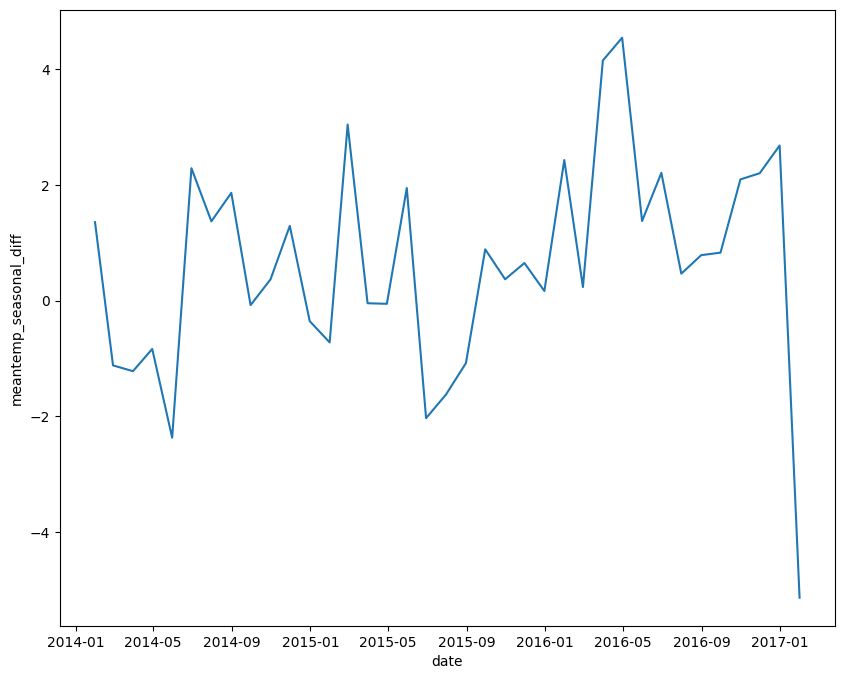

In [19]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.meantemp_seasonal_diff, data = df_monthly)

<Axes: xlabel='date', ylabel='wind_speed_seasonal_diff'>

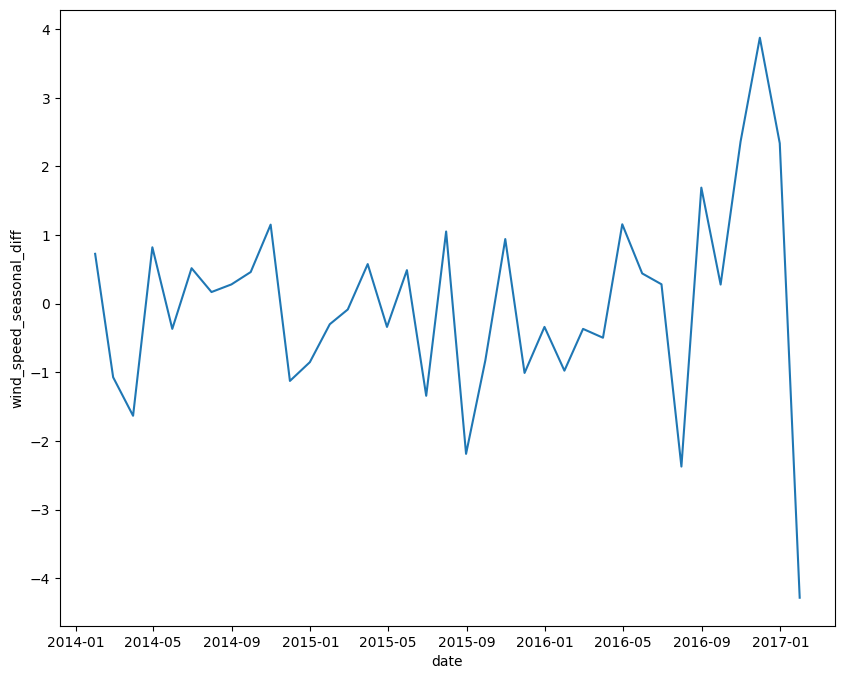

In [20]:
plt.figure(figsize = (10,8))
sns.lineplot(x = df_monthly.index, y = df_monthly.wind_speed_seasonal_diff, data = df_monthly)

# Finding parameters for SARIMA

1. Temperature

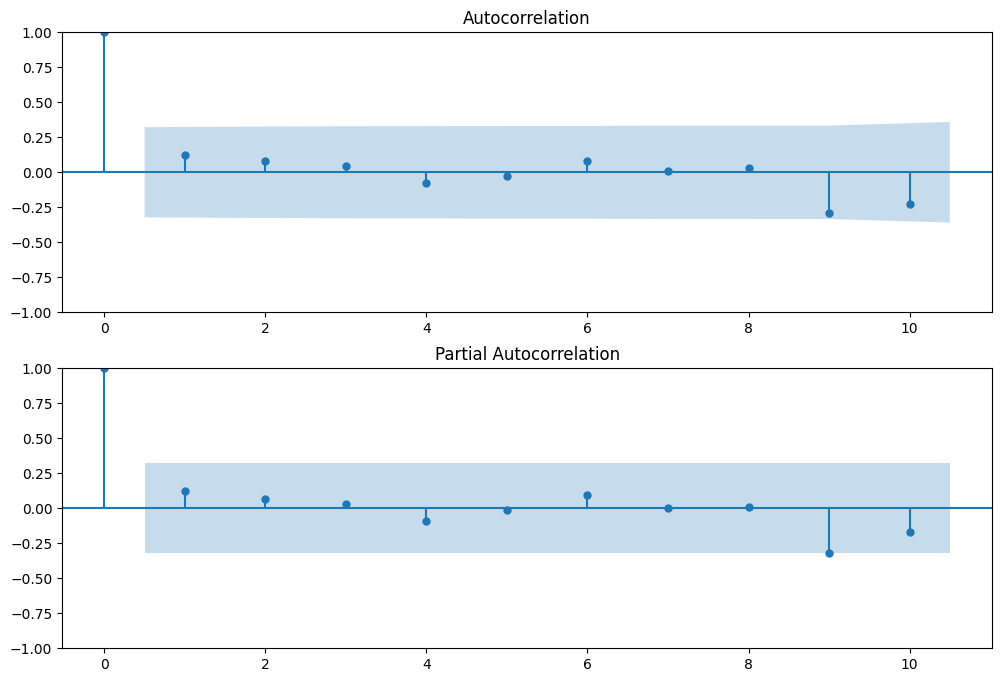

In [21]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly['meantemp_seasonal_diff'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly['meantemp_seasonal_diff'].dropna(),lags=10,ax=ax2)

2. Wind Speed

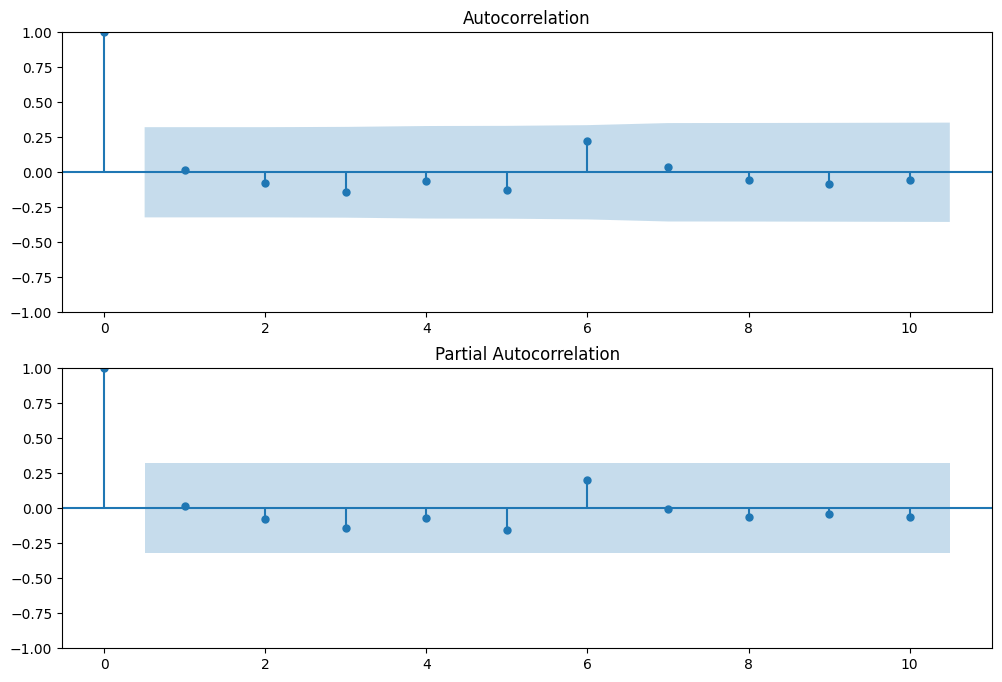

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly['wind_speed_seasonal_diff'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly['wind_speed_seasonal_diff'].dropna(),lags=10,ax=ax2)

3. Humidity

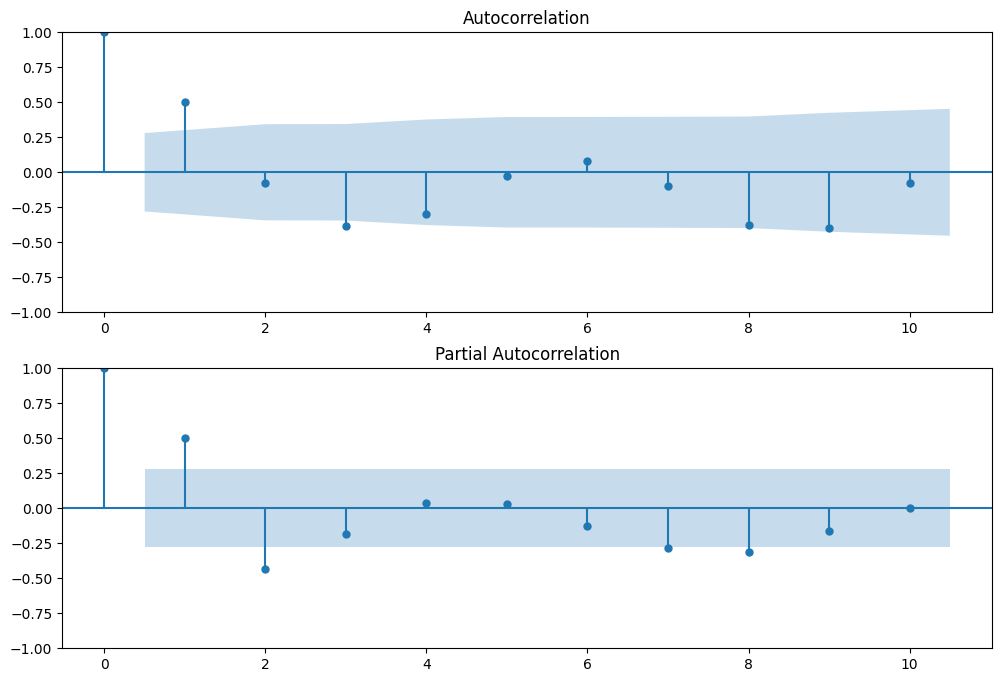

In [23]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly['humidity'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly['humidity'].dropna(),lags=10,ax=ax2)

4. Pressure

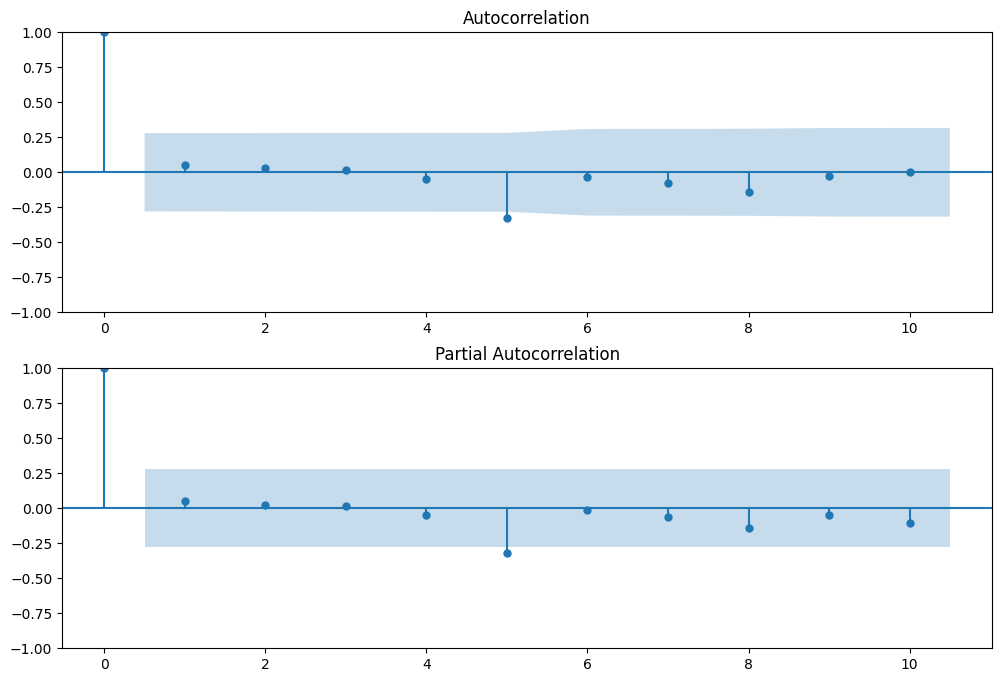

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_monthly['meanpressure'].dropna(),lags=10,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_monthly['meanpressure'].dropna(),lags=10,ax=ax2)

# Creating SARIMA models

1. Temperature

In [25]:
model1 = SARIMAX(df_monthly["meantemp"], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
result1 = model1.fit()
result1.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67308D+00    |proj g|=  1.34712D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   1.038D-06   1.654D+00
  F =   1.6536842733863786     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           meantemp   No. Observations:                   49
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -81.031
Date:                            Thu, 15 Feb 2024   AIC                            164.061
Time:                                    11:18:30   BIC                            165.645
Sample:                                01-31-2013   HQIC                           164.614
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.2794      0.855      6.176      0.000       3.604       6.955
===================================================================================
Ljung-Box (L1) (Q):                   3.83   Jarque-Bera (JB):                 9.20
Prob(Q):                              0.05   Prob(JB):                         0.01
Heteroskedasticity (H):               2.48   Skew:                            -0.70
Prob(H) (two-sided):                  0.13   Kurtosis:                         5.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

2. Wind Speed

In [26]:
model2 = SARIMAX(df_monthly["wind_speed"], order=(0, 1, 0), seasonal_order=(0, 1, 0, 12))
result2 = model2.fit()
result2.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53727D+00    |proj g|=  1.62059D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      4      6      1     0     0   1.725D-06   1.518D+00
  F =   1.5178658237356775     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         wind_speed   No. Observations:                   49
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -74.375
Date:                            Thu, 15 Feb 2024   AIC                            150.751
Time:                                    11:18:30   BIC                            152.334
Sample:                                01-31-2013   HQIC                           151.304
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.6477      0.585      6.236      0.000       2.501       4.794
===================================================================================
Ljung-Box (L1) (Q):                   3.29   Jarque-Bera (JB):                10.75
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               4.56   Skew:                            -0.83
Prob(H) (two-sided):                  0.01   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

3. Humidity

In [27]:
model3 = SARIMAX(df_monthly["humidity"], order=(2, 0, 1), seasonal_order=(2, 0, 1, 12))
result3 = model3.fit()
result3.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.45481D+00    |proj g|=  2.37905D+00

At iterate    5    f=  3.82260D+00    |proj g|=  3.21970D-02

At iterate   10    f=  3.72051D+00    |proj g|=  1.61073D-02

At iterate   15    f=  3.71516D+00    |proj g|=  4.97444D-03

At iterate   20    f=  3.71201D+00    |proj g|=  5.78782D-03

At iterate   25    f=  3.71153D+00    |proj g|=  1.00922D-03

At iterate   30    f=  3.71152D+00    |proj g|=  6.28528D-04

At iterate   35    f=  3.71152D+00    |proj g|=  8.83049D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           humidity   No. Observations:                   49
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -181.865
Date:                            Thu, 15 Feb 2024   AIC                            377.729
Time:                                    11:18:32   BIC                            390.972
Sample:                                01-31-2013   HQIC                           382.753
                                     - 01-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0302      0.536      0.056      0.955      -1.021       1.082
ar.L2          0.8175      0.484      1.689      0.091      -0.131       1.766
ma.L1          0.8297      0.607      1.366      0.172      -0.361       2.020
ar.S.L12       0.5770      0.549      1.051      0.293      -0.499       1.653
ar.S.L24       0.4038      0.449      0.900      0.368      -0.476       1.283
ma.S.L12      -0.6096      1.177     -0.518      0.604      -2.916       1.696
sigma2        55.4439     27.286      2.032      0.042       1.965     108.923
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 2.46
Prob(Q):                              0.83   Prob(JB):                         0.29
Heteroskedasticity (H):               1.31   Skew:                             0.45
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

4.  Pressure

In [28]:
model4 = SARIMAX(df_monthly["meanpressure"], order=(4, 0, 4), seasonal_order=(0, 0, 0, 12))
result4 = model4.fit()
result4.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.11840D+00    |proj g|=  6.67120D-02

At iterate    5    f=  5.10902D+00    |proj g|=  1.96178D-02

At iterate   10    f=  5.09197D+00    |proj g|=  2.01371D-02

At iterate   15    f=  5.08440D+00    |proj g|=  4.84543D-02

At iterate   20    f=  5.07649D+00    |proj g|=  3.84644D-02

At iterate   25    f=  5.04884D+00    |proj g|=  2.71050D-02

At iterate   30    f=  5.04425D+00    |proj g|=  2.07334D-02

At iterate   35    f=  5.03761D+00    |proj g|=  2.08458D-02

At iterate   40    f=  5.03742D+00    |proj g|=  1.82009D-03

At iterate   45    f=  5.03704D+00    |proj g|=  4.12759D-03

At iterate   50    f=  5.03689D+00    |proj g|=  6.74010D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           meanpressure   No. Observations:                   49
Model:               SARIMAX(4, 0, 4)   Log Likelihood                -246.808
Date:                Thu, 15 Feb 2024   AIC                            511.616
Time:                        11:18:33   BIC                            528.642
Sample:                    01-31-2013   HQIC                           518.075
                         - 01-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2656      2.434     -0.520      0.603      -6.036       3.505
ar.L2          0.1306      1.012      0.129      0.897      -1.853       2.114
ar.L3          1.2913      1.854      0.696      0.486      -2.343       4.926
ar.L4          0.8438      1.913      0.441      0.659      -2.905       4.593
ma.L1          1.3866      2.371      0.585      0.559      -3.261       6.035
ma.L2          0.0149      1.262      0.012      0.991      -2.459       2.489
ma.L3         -1.3586      2.195     -0.619      0.536      -5.660       2.943
ma.L4         -0.9039      2.009     -0.450      0.653      -4.841       3.033
sigma2      1089.7227      0.005   2.05e+05      0.000    1089.712    1089.733
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2284.55
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              26.77   Skew:                             5.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.96e+23. Standard errors may be unstable.
"""

# Prediction and fitted values graph

1. Temperature

<Axes: xlabel='date', ylabel='meantemp'>

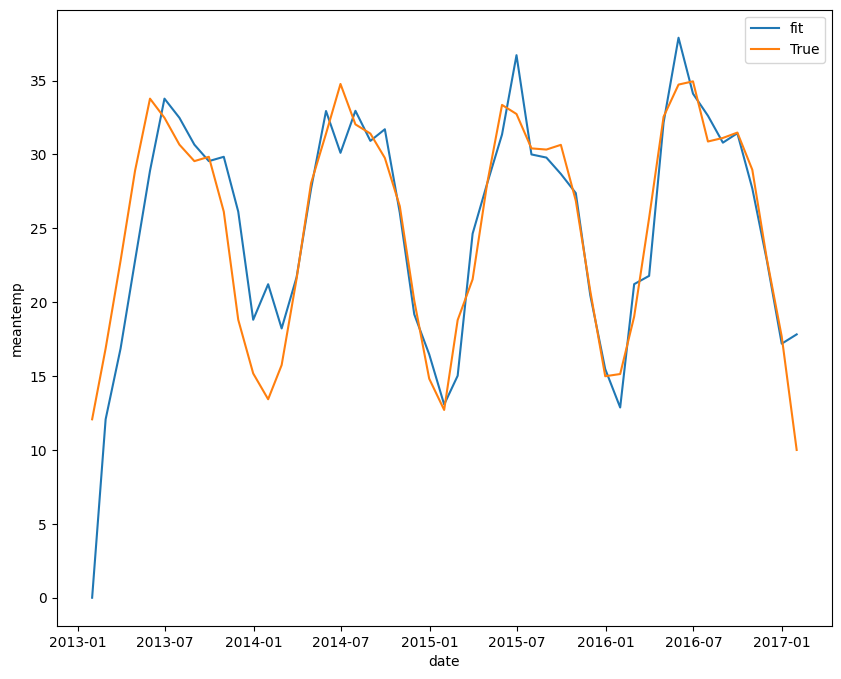

In [29]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=df_monthly.index, y=result1.fittedvalues, label = "fit")
sns.lineplot(x = df_monthly.index, y = df_monthly.meantemp, data = df_monthly, label = "True")

In [30]:
model1_pred = result1.get_prediction(start = df1_monthly.index[0],end = df1_monthly.index[-1], dynamic = True)

<Axes: xlabel='date', ylabel='predicted_mean'>

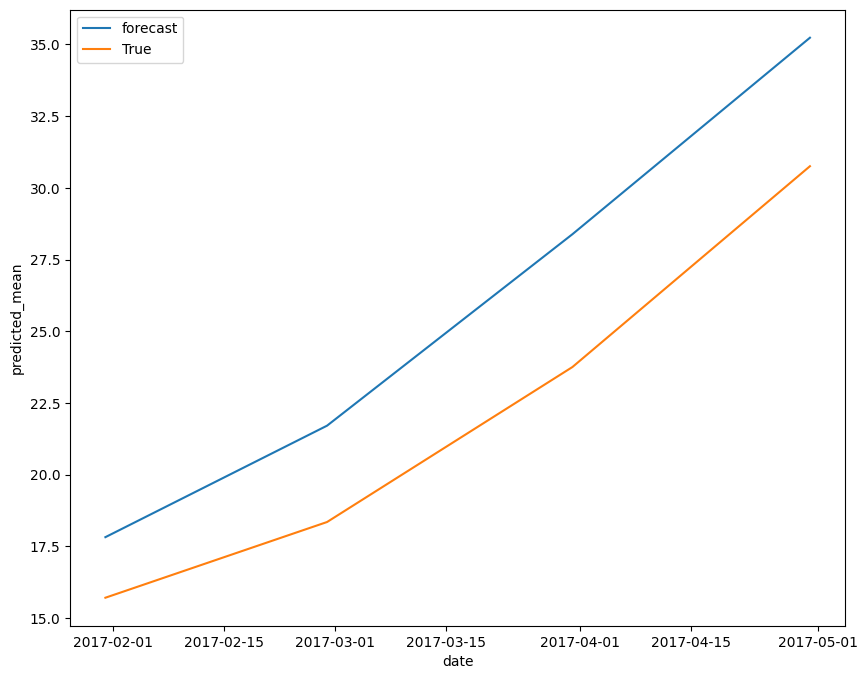

In [31]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model1_pred.predicted_mean.index, y = model1_pred.predicted_mean, label = "forecast")
sns.lineplot(x = df1_monthly.index, y = df1_monthly.meantemp, data = df1_monthly, label = "True")

<Axes: xlabel='date', ylabel='predicted_mean'>

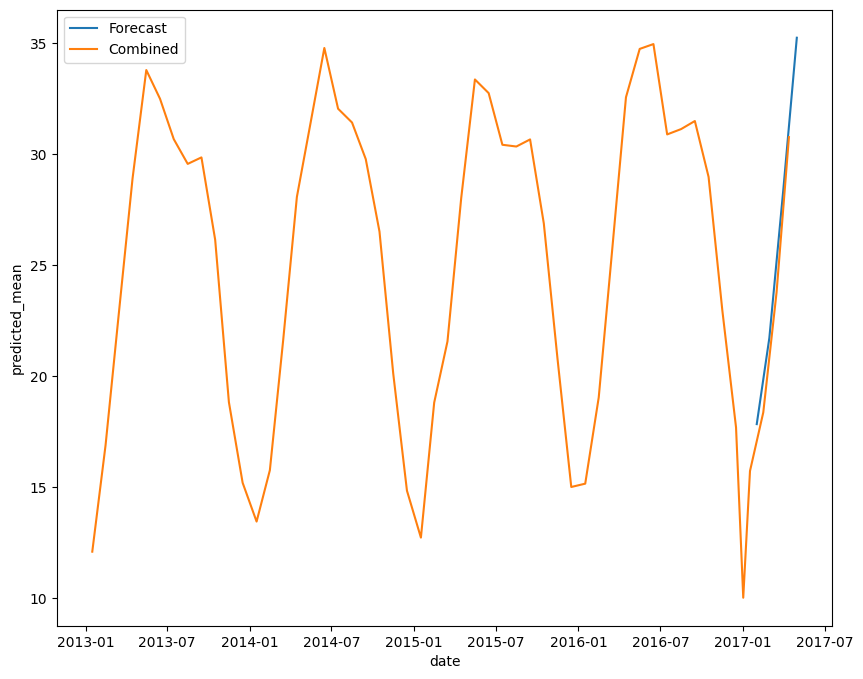

In [32]:
df2 = pd.concat([df_monthly, df1_monthly], ignore_index = True)
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model1_pred.predicted_mean.index, y = model1_pred.predicted_mean, label = "Forecast")
sns.lineplot(x = df2.date, y = df2.meantemp, data = df2, label = "Combined")

2. Humidity

<Axes: xlabel='date', ylabel='humidity'>

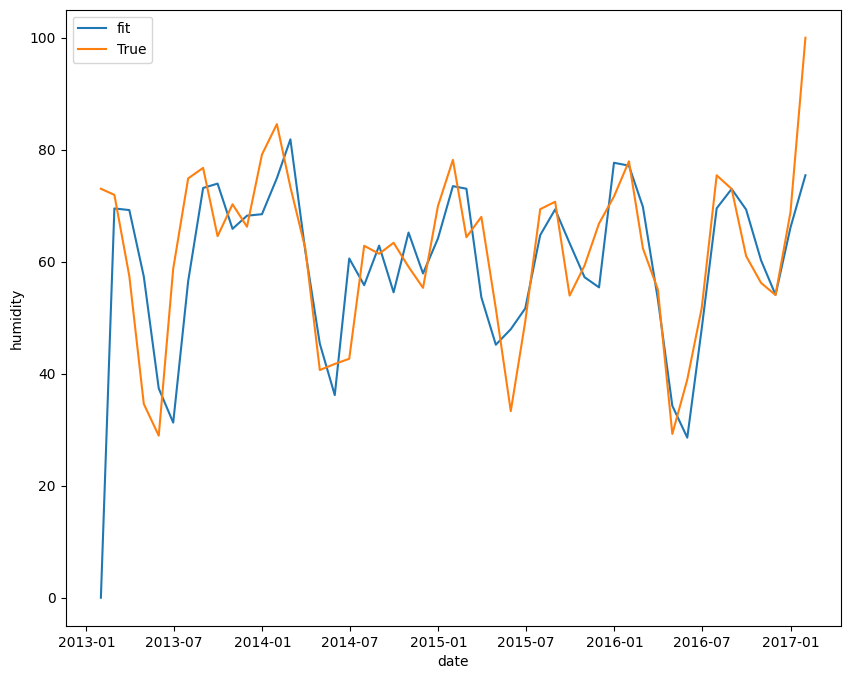

In [33]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=df_monthly.index, y=result3.fittedvalues, label = "fit")
sns.lineplot(x = df_monthly.index, y = df_monthly.humidity, data = df_monthly, label = "True")

In [34]:
model3_pred = result3.get_prediction(start = df1_monthly.index[0],end = df1_monthly.index[-1], dynamic = True)

<Axes: xlabel='date', ylabel='predicted_mean'>

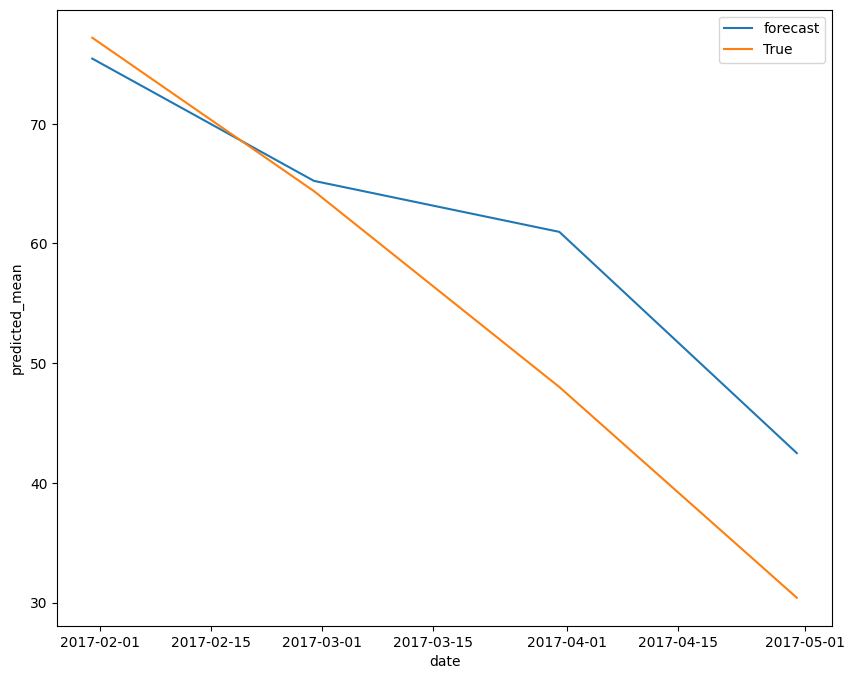

In [35]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model3_pred.predicted_mean.index, y = model3_pred.predicted_mean, label = "forecast")
sns.lineplot(x = df1_monthly.index, y = df1_monthly.humidity, data = df1_monthly, label = "True")

<Axes: xlabel='date', ylabel='predicted_mean'>

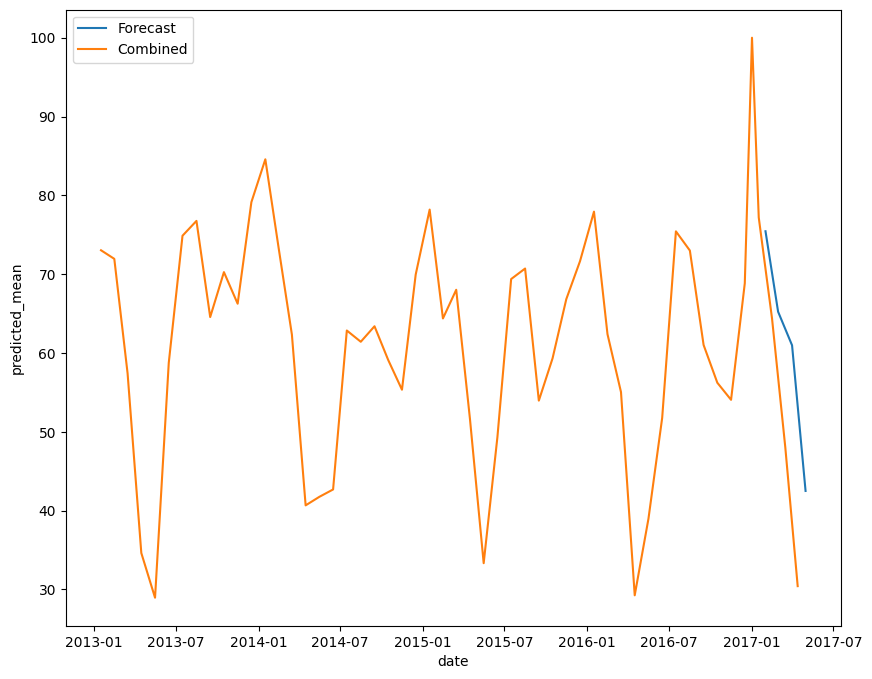

In [36]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model3_pred.predicted_mean.index, y = model3_pred.predicted_mean, label = "Forecast")
sns.lineplot(x = df2.date, y = df2.humidity, data = df2, label = "Combined")

3. Wind Speed

<Axes: xlabel='date', ylabel='wind_speed'>

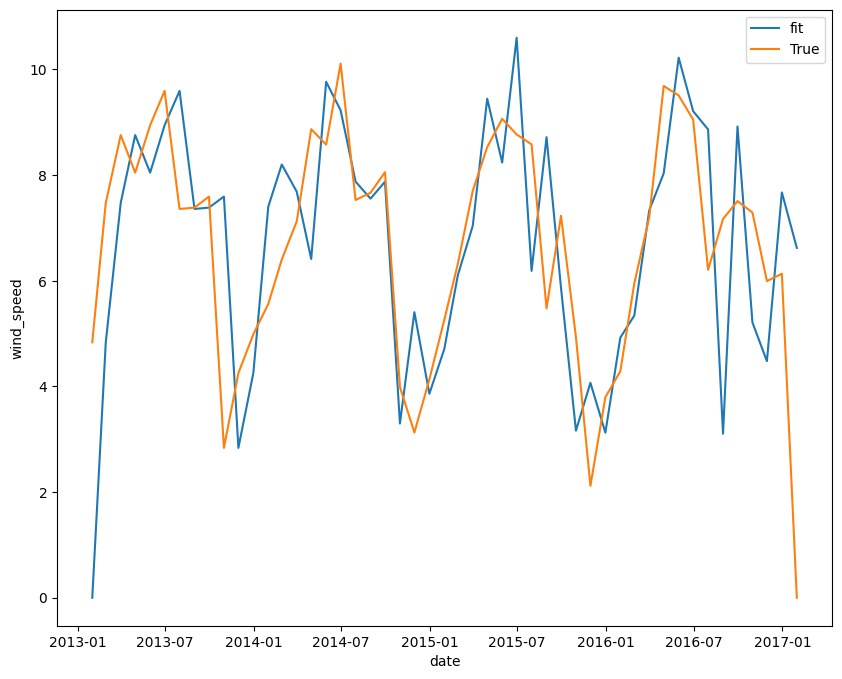

In [37]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=df_monthly.index, y=result2.fittedvalues, label = "fit")
sns.lineplot(x = df_monthly.index, y = df_monthly.wind_speed, data = df_monthly, label = "True")

In [38]:
model2_pred = result2.get_prediction(start = df1_monthly.index[0],end = df1_monthly.index[-1], dynamic = True)

<Axes: xlabel='date', ylabel='predicted_mean'>

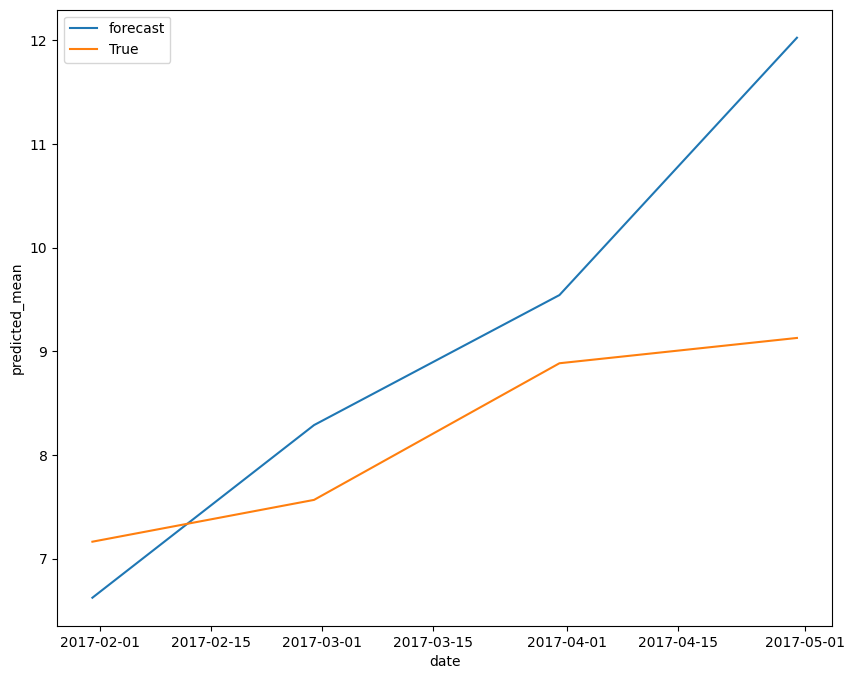

In [39]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model2_pred.predicted_mean.index, y = model2_pred.predicted_mean, label = "forecast")
sns.lineplot(x = df1_monthly.index, y = df1_monthly.wind_speed, data = df1_monthly, label = "True")

<Axes: xlabel='date', ylabel='predicted_mean'>

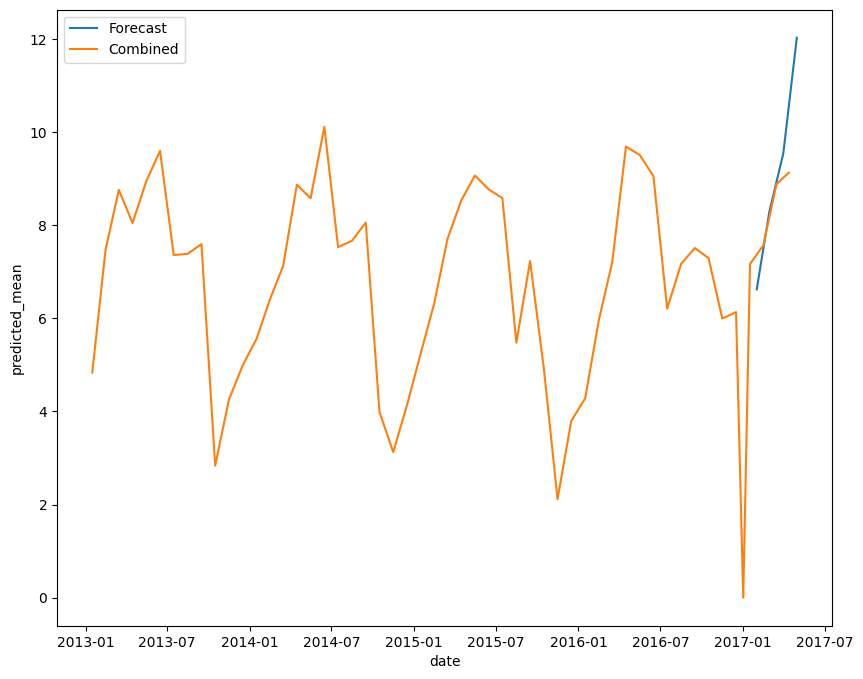

In [40]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model2_pred.predicted_mean.index, y = model2_pred.predicted_mean, label = "Forecast")
sns.lineplot(x = df2.date, y = df2.wind_speed, data = df2, label = "Combined")

4. Mean Pressure

<Axes: xlabel='date', ylabel='meanpressure'>

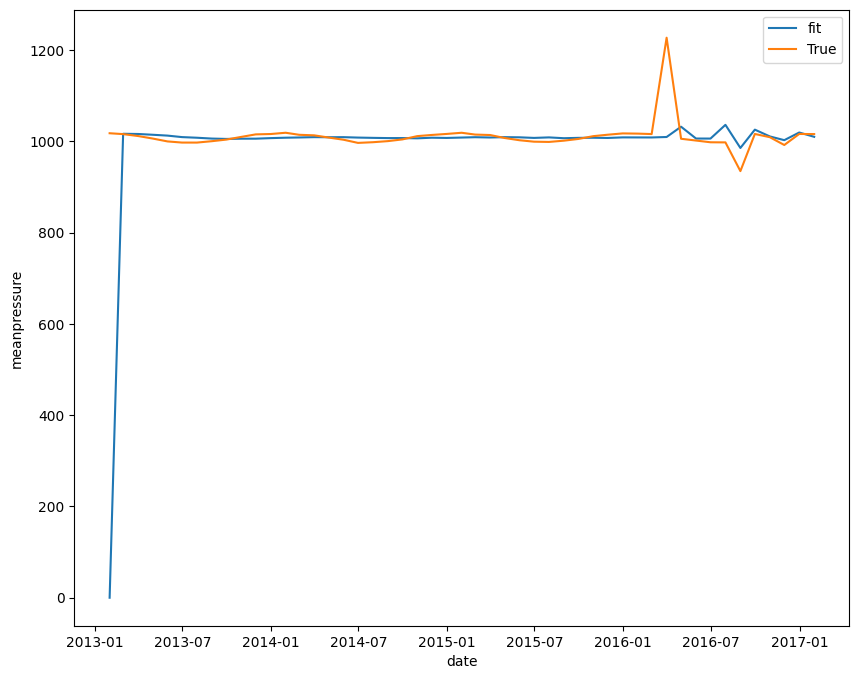

In [41]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=df_monthly.index, y=result4.fittedvalues, label = "fit")
sns.lineplot(x = df_monthly.index, y = df_monthly.meanpressure, data = df_monthly, label = "True")

In [42]:
model4_pred = result4.get_prediction(start = df1_monthly.index[0],end = df1_monthly.index[-1], dynamic = True)

<Axes: xlabel='date', ylabel='predicted_mean'>

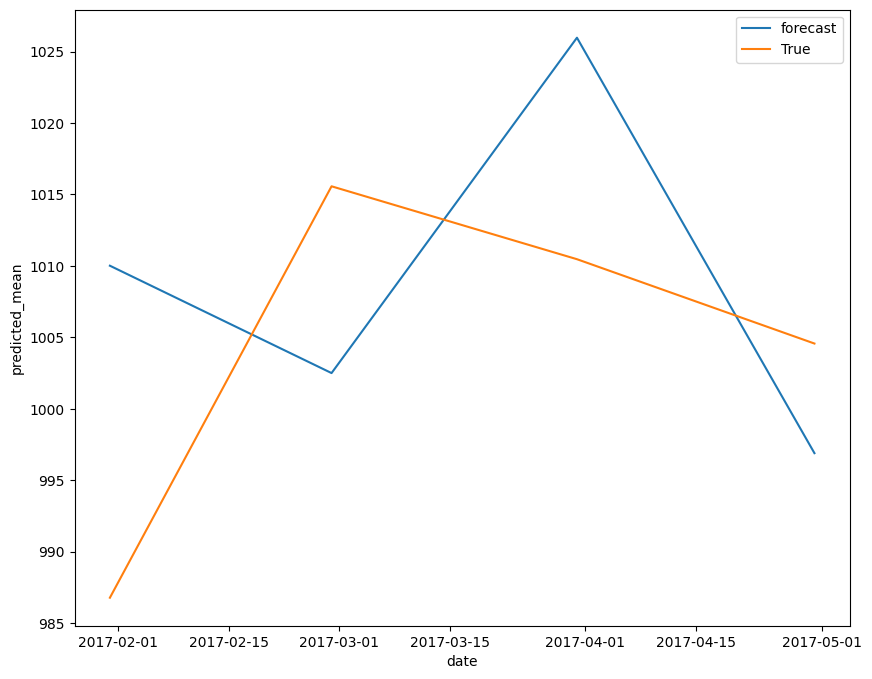

In [43]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model4_pred.predicted_mean.index, y = model4_pred.predicted_mean, label = "forecast")
sns.lineplot(x = df1_monthly.index, y = df1_monthly.meanpressure, data = df1_monthly, label = "True")

<Axes: xlabel='date', ylabel='predicted_mean'>

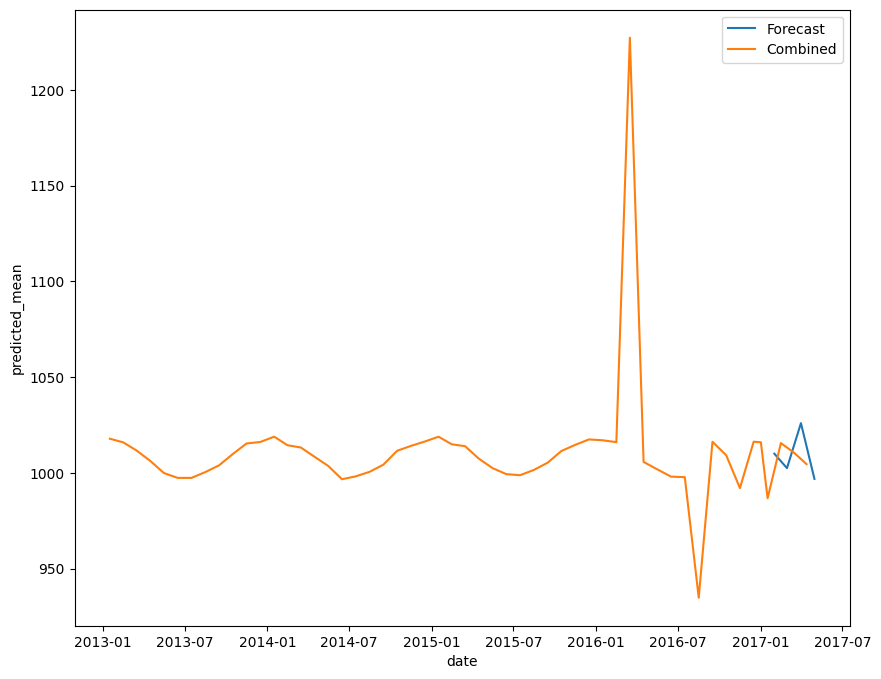

In [44]:
fig = plt.figure(figsize=(10,8))
sns.lineplot(x = model4_pred.predicted_mean.index, y = model4_pred.predicted_mean, label = "Forecast")
sns.lineplot(x = df2.date, y = df2.meanpressure, data = df2, label = "Combined")